In [1]:
import pah_spec
import matplotlib.pyplot as plt
import astropy.units as u

First, initialize the `PahSpec` object, which loads the $\tilde{p}_{\rm \lambda_{em}}(\lambda_{\rm abs})$ basis spectra into memory.

In [2]:
ps = pah_spec.PahSpec()

The `pah_spec` module has an attribute, `pah_spec.GRAIN_SIZES`, specifying which grain sizes the basis spectra corresond to.

Our instance of the `PahSpec` object has attributes specifying the $\lambda_{\rm abs}$ and $\lambda_{\rm em}$ wavelengths the basis spectra are defind for: `ps.emission_wavelengths` and `ps.photon_wavelengths`.

Read in the $U = 1$ mMMP radiation field data, along with the standard size distribution and ionization functions that we will use to generate our spectrum. These will be available as default settings in the final version of the `PahSpec` class.

In [5]:
# radiation field
wavelengths_u_arr, u_lambda_arr, _ = pah_spec._read_d21_radiation_field()

# size distribution and ionization functions, defined over the same grain sizes as pah_spec.GRAIN_SIZES
_, size_dist_ion, size_dist_neu, _ = pah_spec._read_d21_size_dist("st_", "std")

Pass our radiation field and size distribution/ionization function to the `ps.generate_spectrum()` method to scale the basis spectra to the radiation field, and then integrate over size distribution and ionization function.

In [7]:
print(ps.generate_spectrum.__doc__)

Scale the basis spectra for ionized and neutral PAHs to an input radiation field.

Parameters
----------
wavelength_arr : astropy.units.Quantity (array_like)
    Wavelength array for the radiation field u_lambda in u.um
u_lambda_arr : astropy.units.Quantity (array_like)
    Array of length len(wavelength_arr) with the radiation field in u.erg / u.cm ** 4
size_dist_neu : array_like
    Neutral PAH size distribution and ionization function for each grain size in pah_spec.GRAIN_SIZES
size_dist_ion : array_like
    Ionized PAH size distribution and ionization function for each grain size in pah_spec.GRAIN_SIZES

Returns
-------
spectrum_neu : astropy.units.Quantity (array_like)
    Size- and ionization-integrated spectrum for neutral PAHs heated by the input u_lambda in u.erg / (u.cm * u.s)
spectrum_ion : astropy.units.Quantity (array_like)
    Size- and ionization-integrated spectrum for neutral PAHs heated by the input u_lambda in u.erg / (u.cm * u.s)

Raises
------
AttributeError
    If

In [8]:
spectrum_ion, spectrum_neu = ps.generate_spectrum(wavelengths_u_arr[0], u_lambda_arr[0], size_dist_neu, size_dist_ion)

(1e-27, 3e-24)

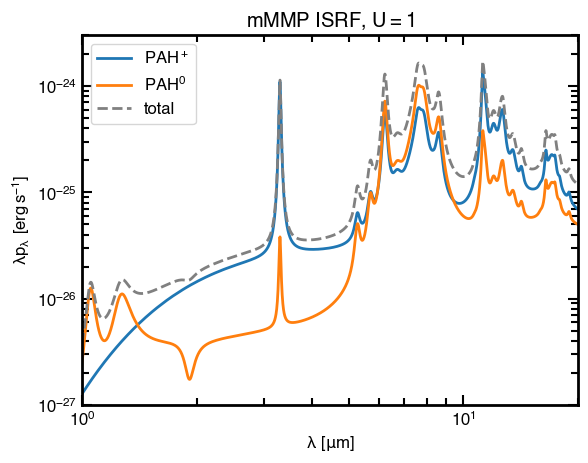

In [11]:
plt.loglog(ps.emission_wavelengths, spectrum_ion * ps.emission_wavelengths.to(u.cm), label=r"$PAH^+$")
plt.loglog(ps.emission_wavelengths, spectrum_neu * ps.emission_wavelengths.to(u.cm), label=r"$PAH^0$")
plt.loglog(ps.emission_wavelengths, (spectrum_ion + spectrum_neu) * ps.emission_wavelengths.to(u.cm), label="total", linestyle="--", color="grey")
plt.legend()
plt.xlabel(r"$\lambda~[\mu m]$")
plt.ylabel(r"$\lambda p_\lambda~[erg\,s^{-1}]$")
plt.title("mMMP ISRF, $U=1$")
plt.xlim(1, 20)
plt.ylim(1e-27, 3e-24)